In [1]:
#Importing the needed libraries for the project
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Transforming the CSV file in a DataFrame
comexstat = pd.read_csv('data_comexstat.csv', encoding='iso8859_2')

In [3]:
#The number of exports that exists in all data
comexstat['type'].value_counts()

Export    105861
Import     12104
Name: type, dtype: int64

In [4]:
#Creating a column with Year only to help with the query that need to be grouped by this feature
comexstat['year'] = comexstat['date'].str.slice(0,4)

In [5]:
#Creating a new DataFrame based on the comexstat with only Export type rows
export = comexstat[comexstat['type'] == 'Export']

In [6]:
#Creating two new DataFrames
#The first contains the sum of all tons of soybeans exported separated by month
montly_soybeans = export[export['product'] == 'soybeans'].groupby(['date'])['tons'].sum().reset_index()
#The second is the same, but separated by years
year_soybeans = export[export['product'] == 'soybeans'].groupby(['year'])['tons'].sum().reset_index()

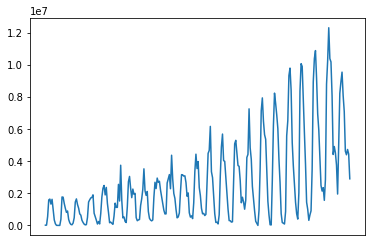

In [7]:
#Making the plot of mensal tons of soybeans exported
plt.plot('date', 'tons', data = montly_soybeans)
plt.xticks([])
plt.show()

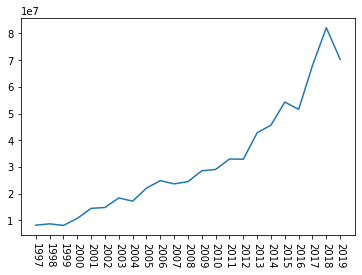

In [8]:
#Making the plot of annual tons of soybeans exported
#With annual plot we can see more clearly how the curve grows
plt.plot('year', 'tons', data = year_soybeans)
plt.xticks(rotation=-90)
plt.show()

In [9]:
#Creating two new DataFrames
#The first contains the sum of all tons of soybean_meal exported separated by month
montly_soybean_meal = export[export['product'] == 'soybean_meal'].groupby(['date'])['tons'].sum().reset_index()
#The second is the same, but separated by years
year_soybean_meal = export[export['product'] == 'soybean_meal'].groupby(['year'])['tons'].sum().reset_index()

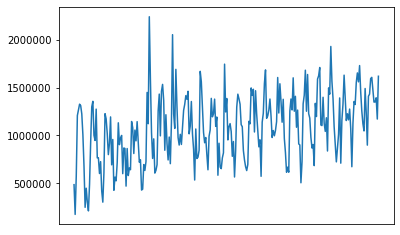

In [10]:
#Making the plot of mensal tons of soybean_meal exported
plt.plot('date', 'tons', data = montly_soybean_meal)
plt.xticks([])
plt.show()

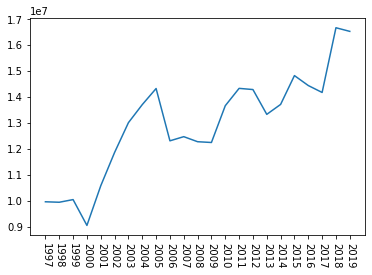

In [11]:
#Making the plot of annual tons of soybean_meal exported
plt.plot('year', 'tons', data = year_soybean_meal)
plt.xticks(rotation=-90)
plt.show()

In [12]:
#Creating two new DataFrames
#The first contains the sum of all tons of soybean_oil exported separated by month
montly_soybean_oil = export[export['product'] == 'soybean_oil'].groupby(['date'])['tons'].sum().reset_index()
#The second is the same, but separated by years
year_soybean_oil = export[export['product'] == 'soybean_oil'].groupby(['year'])['tons'].sum().reset_index()

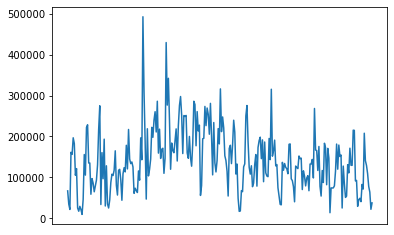

In [13]:
#Making the plot of mensal tons of soybean_oil exported
plt.plot('date', 'tons', data = montly_soybean_oil)
plt.xticks([])
plt.show()

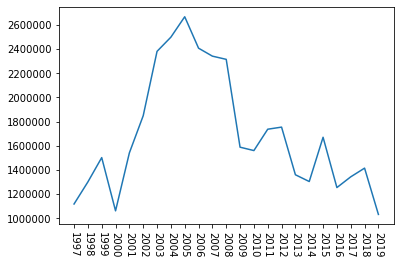

In [14]:
#Making the plot of annual tons of soybean_oil exported
plt.plot('year', 'tons', data = year_soybean_oil)
plt.xticks(rotation=-90)
plt.show()

In [15]:
#Now, i will create a DataFrame with Year column values greather than 2015
export_last5years = export[export['year'].astype(int) >= 2015]

In [16]:
#Then grouping the DataFrame with a sum of the tons first, separating by what product is and what year
grouped = export_last5years.groupby(['product', 'year'])['tons'].sum()

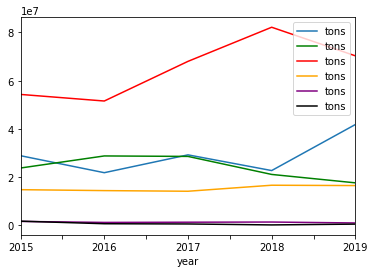

In [17]:
#Now, making a plot with all lines, to be easy to see what is the most important
#With the graph we can see that Soybeans, Corn and Sugar is the 3 most important based on tons of products
ax = plt.gca()

grouped['corn'].reset_index().plot(kind='line',x='year',y='tons',ax=ax)
grouped['sugar'].reset_index().plot(kind='line',x='year',y='tons',color='green', ax=ax)
grouped['soybeans'].reset_index().plot(kind='line',x='year',y='tons',color='red', ax=ax)
grouped['soybean_meal'].reset_index().plot(kind='line',x='year',y='tons',color='orange', ax=ax)
grouped['soybean_oil'].reset_index().plot(kind='line',x='year',y='tons',color='purple', ax=ax)
grouped['wheat'].reset_index().plot(kind='line',x='year',y='tons',color='black', ax=ax)

In [18]:
#We can make a table with the mean of values to have a different view
#With the table the same three products (Soybeans, Corn and Sugar) are the most important based on tons of products
grouped.reset_index().groupby(['product'])['tons'].mean().reset_index().sort_values('tons', ascending=False)

,product,tons
3,soybeans,6.526629e+07
0,corn,2.891987e+07
4,sugar,2.400673e+07
1,soybean_meal,1.532950e+07
2,soybean_oil,1.342286e+06
5,wheat,7.771673e+05


In [19]:
#Then grouping the DataFrame with a sum of the usd now, separating by what product is and what year
grouped = export_last5years.groupby(['product', 'year'])['usd'].sum()

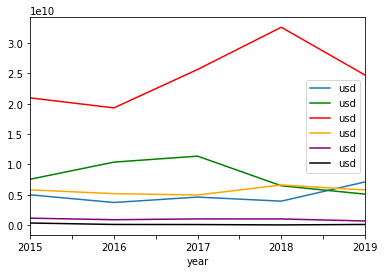

In [20]:
#Now, making a plot with all lines, to be easy to see what is the most important
#With the graph we can see that Soybeans, Sugar and Soybean Meal is the 3 most important based on USD of products
ax = plt.gca()

grouped['corn'].reset_index().plot(kind='line',x='year',y='usd',ax=ax)
grouped['sugar'].reset_index().plot(kind='line',x='year',y='usd',color='green', ax=ax)
grouped['soybeans'].reset_index().plot(kind='line',x='year',y='usd',color='red', ax=ax)
grouped['soybean_meal'].reset_index().plot(kind='line',x='year',y='usd',color='orange', ax=ax)
grouped['soybean_oil'].reset_index().plot(kind='line',x='year',y='usd',color='purple', ax=ax)
grouped['wheat'].reset_index().plot(kind='line',x='year',y='usd',color='black', ax=ax)

In [21]:
#We can make a table with the mean of values to have a different view
#With the table the same three products (Soybeans, Sugar and Soybean Meal) are the most important based on USD of products
grouped.reset_index().groupby(['product'])['usd'].mean().reset_index().sort_values('usd', ascending=False)

,product,usd
3,soybeans,2.466511e+10
4,sugar,8.187697e+09
1,soybean_meal,5.681545e+09
0,corn,4.889544e+09
2,soybean_oil,9.591894e+08
5,wheat,1.453891e+08


In [22]:
#Using a table we can see that Sea is the most important route of corn in the last 5 years
grouped = export_last5years.groupby(['product','route'])['tons'].sum()
toPlot = grouped['corn'].reset_index()
print(toPlot)

    route          tons
0     Air  1.015261e+04
1  Ground  7.250953e+04
2   Other  2.660552e+05
3   River  5.869627e+06
4     Sea  1.383810e+08


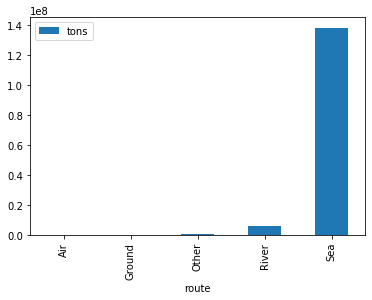

In [23]:
#But we can see the same think using a plot of the data
ax = plt.gca()
toPlot.plot(kind='bar',x='route',y='tons',ax=ax)

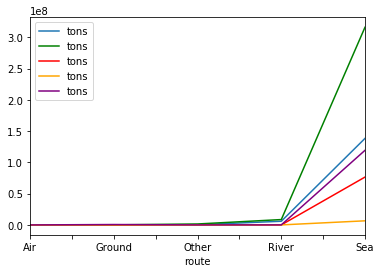

In [24]:
#To answer the second question we need to see the route of all products together, then a plot is most easy method to show this
#With this plot, is possible to look that Sea is the most important route to all products
ax = plt.gca()
grouped['corn'].reset_index().plot(kind='line',x='route',y='tons',ax=ax)
grouped['soybeans'].reset_index().plot(kind='line',x='route',y='tons',color='green', ax=ax)
grouped['soybean_meal'].reset_index().plot(kind='line',x='route',y='tons',color='red', ax=ax)
grouped['soybean_oil'].reset_index().plot(kind='line',x='route',y='tons',color='orange', ax=ax)
grouped['sugar'].reset_index().plot(kind='line',x='route',y='tons',color='purple', ax=ax)

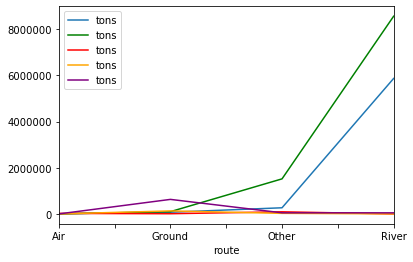

In [25]:
#Removing the Sea Route of the plots is possible to see more clearly what is the next best route
#And only the Sugar have as the second most important route the Ground
#All other have the River as the second best route
ax = plt.gca()
grouped['corn'].reset_index()[0:4].plot(kind='line',x='route',y='tons',ax=ax)
grouped['soybeans'].reset_index()[0:4].plot(kind='line',x='route',y='tons',color='green', ax=ax)
grouped['soybean_meal'].reset_index()[0:4].plot(kind='line',x='route',y='tons',color='red', ax=ax)
grouped['soybean_oil'].reset_index()[0:4].plot(kind='line',x='route',y='tons',color='orange', ax=ax)
grouped['sugar'].reset_index()[0:4].plot(kind='line',x='route',y='tons',color='purple', ax=ax)

                 country         tons
0                Algeria  6696854.262
1             Bangladesh  6331640.155
2                  India  5111371.882
3   United Arab Emirates  4545802.219
4           Saudi Arabia  4249461.903
5                Nigeria  4156814.026
6                   Iraq  3555241.197
7                  Egypt  3071223.738
8               Malaysia  2981729.159
9                Morocco  2850892.879
10                 China  2526895.035
11                Canada  2461989.799
12                 Yemen  1737514.636
13                  Iran  1432084.983
14                Angola  1146396.134
15             Indonesia  1093941.658
16                Russia  1036085.146
17               Tunisia  1027844.142
18         United States   929247.684
19                 Benin   889093.373


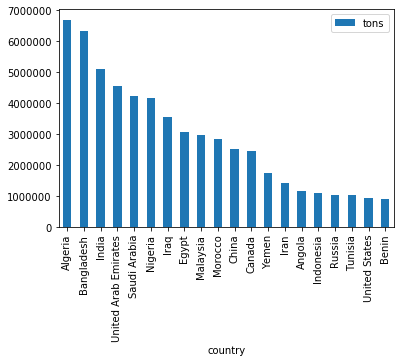

In [26]:
#This DataFrame must be based on Export and Import values
#Then is make a group by Country and by Product based on sum of tons of the products
#Then is show only the best 20 countries for sugar that is Algeria, Bangladesh and India
routes_last3years = comexstat[comexstat['year'].astype(int) >= 2017]
grouped = routes_last3years.groupby(['product','country'])['tons'].sum()
print(grouped['sugar'].reset_index().sort_values('tons', ascending=False).reset_index(drop=True)[:20])
ax = plt.gca()
grouped['sugar'].reset_index().sort_values('tons', ascending=False)[:20].plot(kind='bar',x='country',y='tons',ax=ax)

               country          tons
0                 Iran  1.642565e+07
1                Japan  9.676921e+06
2              Vietnam  9.446982e+06
3                Egypt  8.353797e+06
4                Spain  8.243946e+06
5          South Korea  6.273068e+06
6               Taiwan  5.059363e+06
7             Malaysia  4.238332e+06
8           Bangladesh  3.228436e+06
9             Paraguay  2.870567e+06
10              Mexico  2.519013e+06
11             Morocco  2.124073e+06
12  Dominican Republic  2.053016e+06
13            Portugal  1.950205e+06
14        Saudi Arabia  1.810854e+06
15         Netherlands  1.757881e+06
16             Algeria  1.618685e+06
17             Ireland  1.033757e+06
18              Jordan  9.128016e+05
19            Colombia  8.620182e+05


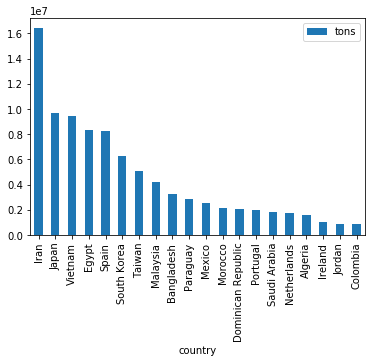

In [27]:
#Is show only the best 20 countries for corn that is Iran, Japan and Vietnam
print(grouped['corn'].reset_index().sort_values('tons', ascending=False).reset_index(drop=True)[:20])
ax = plt.gca()
grouped['corn'].reset_index().sort_values('tons', ascending=False)[:20].plot(kind='bar',x='country',y='tons',ax=ax)

In [28]:
#Grouping the DataFrame export, using the sum of tons separated by product and state 
exportByState = export.groupby(['product','state'])['tons'].sum()

  state          tons
0    MT  1.518234e+08
1    PR  5.386247e+07
2    GO  2.846462e+07
3    MS  1.827060e+07
4    SP  7.343888e+06


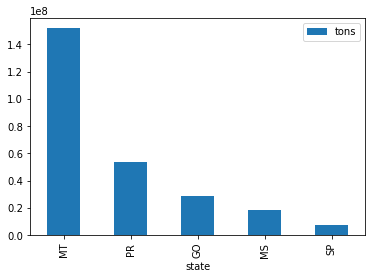

In [29]:
#Showing the 5 most important states based on corn production with a table and plot
corn = exportByState['corn'].reset_index().sort_values('tons', ascending=False)[:5].reset_index(drop=True)
print(corn)
ax = plt.gca()
corn.plot(kind='bar',x='state',y='tons',ax=ax)

  state          tons
0    MT  2.157785e+08
1    PR  1.345502e+08
2    RS  1.196807e+08
3    GO  5.702533e+07
4    SP  3.460050e+07


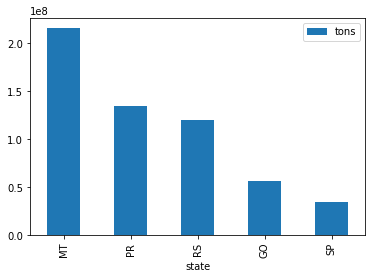

In [30]:
#Showing the 5 most important states based on soybeans production with a table and plot
soybeans = exportByState['soybeans'].reset_index().sort_values('tons', ascending=False)[:5].reset_index(drop=True)
print(soybeans)
ax = plt.gca()
soybeans.plot(kind='bar',x='state',y='tons',ax=ax)

  state          tons
0    PR  8.639237e+07
1    MT  7.946227e+07
2    RS  4.892746e+07
3    GO  2.868658e+07
4    BA  1.736806e+07


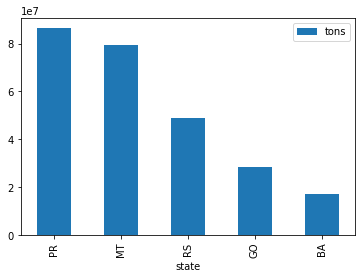

In [31]:
#Showing the 5 most important states based on soybean meal production with a table and plot
soybean_meal = exportByState['soybean_meal'].reset_index().sort_values('tons', ascending=False)[:5].reset_index(drop=True)
print(soybean_meal)
ax = plt.gca()
soybean_meal.plot(kind='bar',x='state',y='tons',ax=ax)

  state          tons
0    PR  1.648205e+07
1    RS  9.279786e+06
2    MT  7.423877e+06
3    SC  1.786134e+06
4    GO  1.094295e+06


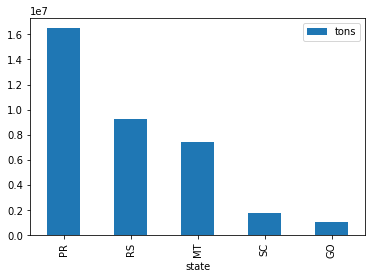

In [32]:
#Showing the 5 most important states based on soybean oil production with a table and plot
soybean_oil = exportByState['soybean_oil'].reset_index().sort_values('tons', ascending=False)[:5].reset_index(drop=True)
print(soybean_oil)
ax = plt.gca()
soybean_oil.plot(kind='bar',x='state',y='tons',ax=ax)

  state          tons
0    SP  1.879603e+08
1    MG  2.318293e+07
2    PR  2.198688e+07
3    AL  1.261794e+07
4    MS  8.406289e+06


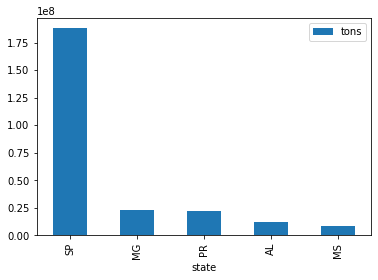

In [33]:
#Showing the 5 most important states based on sugar production with a table and plot
sugar = exportByState['sugar'].reset_index().sort_values('tons', ascending=False)[:5].reset_index(drop=True)
print(sugar)
ax = plt.gca()
sugar.plot(kind='bar',x='state',y='tons',ax=ax)

  state         tons
0    RS  6734981.032
1    PR   824974.624
2    SC    81340.920
3    SP    10066.817
4    MS      910.108


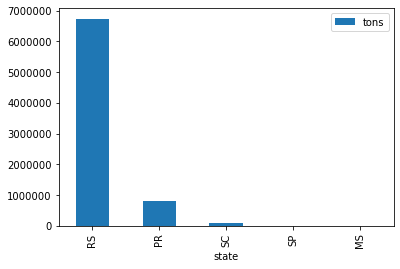

In [34]:
#Showing the 5 most important states based on wheat production with a table and plot
wheat = exportByState['wheat'].reset_index().sort_values('tons', ascending=False)[:5].reset_index(drop=True)
print(wheat)
ax = plt.gca()
wheat.plot(kind='bar',x='state',y='tons',ax=ax)

In [35]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [36]:
covariates = pd.read_excel('covariates.xlsx')

In [37]:
grouped = export.groupby(['product','year'])['tons'].sum()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse

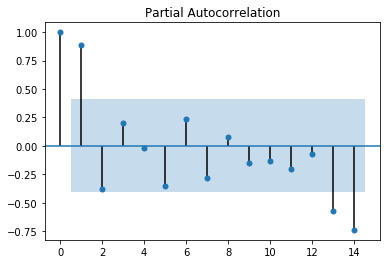

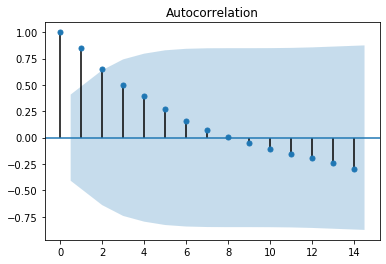

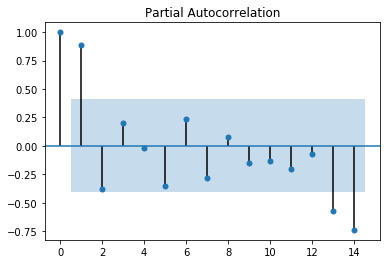

In [39]:
#Plot of Autocorrelation of the values from tons column
plot_acf(grouped['soybeans'].reset_index()['tons'])

#Plot of Partial Autocorrelation of the values from tons column
plot_pacf(grouped['soybeans'].reset_index()['tons'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


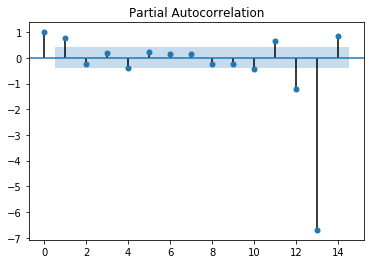

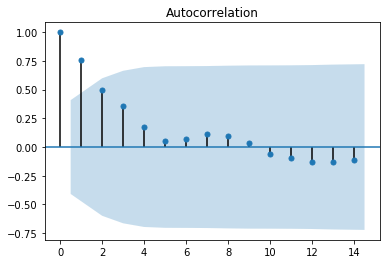

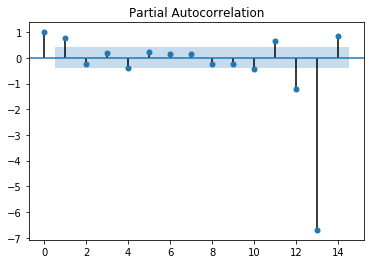

In [46]:
#Plot of Autocorrelation of the values from tons column
plot_acf(grouped['soybean_meal'].reset_index()['tons'])

#Plot of Partial Autocorrelation of the values from tons column
plot_pacf(grouped['soybean_meal'].reset_index()['tons'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


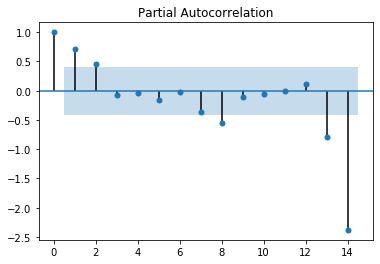

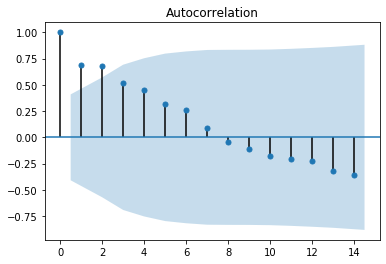

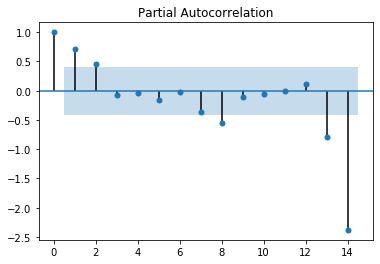

In [47]:
#Plot of Autocorrelation of the values from tons column
plot_acf(grouped['corn'].reset_index()['tons'])

#Plot of Partial Autocorrelation of the values from tons column
plot_pacf(grouped['corn'].reset_index()['tons'])

In [40]:
#Separating a piece of data for test of prediction
train = grouped['soybeans'].reset_index()['tons'][:18]
test = grouped['soybeans'].reset_index()['tons'][18:]
#Some tests are make with diferent values and the best value found is 2 for d variable and 1 for p variable
#With a test RMSE value of 6914363.769062395
model = ARIMA(train, order=(1,2,0))
model_fit = model.fit()
pred = model_fit.predict(len(train), len(train) + 4, typ='levels')
rmse = mse(test, pred)**0.5
print(rmse)

6914363.769062395


In [49]:
#With this model whe can create the future predictions for 11 years
model = ARIMA(grouped['soybeans'].reset_index()['tons'], order=(1,2,0))
model_fit = model.fit()
pred_soy = model_fit.predict(len(grouped['soybeans'].reset_index()['tons']), len(grouped['soybeans'].reset_index()['tons']) + 10, typ='levels')
print(pred_soy)

23    7.143397e+07
24    6.473280e+07
25    6.131593e+07
26    5.524378e+07
27    4.968909e+07
28    4.295709e+07
29    3.595307e+07
30    2.819345e+07
31    1.993654e+07
32    1.104437e+07
33    1.590625e+06
dtype: float64


In [50]:
#Separating a piece of data for test of prediction
train = grouped['soybean_meal'].reset_index()['tons'][:18]
test = grouped['soybean_meal'].reset_index()['tons'][18:]
#Some tests are make with diferent values and the best value found is 2 for d variable
#With a test RMSE value of 755971.1985557004
model = ARIMA(train, order=(0,2,0))
model_fit = model.fit()
pred = model_fit.predict(len(train), len(train) + 4, typ='levels')
rmse = mse(test, pred)**0.5
print(rmse)

755971.1985557004


In [51]:
#With this model whe can create the future predictions for 11 years
model = ARIMA(grouped['soybean_meal'].reset_index()['tons'], order=(0,2,0))
model_fit = model.fit()
pred_soym = model_fit.predict(len(grouped['soybean_meal'].reset_index()['tons']), len(grouped['soybean_meal'].reset_index()['tons']) + 10, typ='levels')
print(pred_soym)

23    1.638500e+07
24    1.623383e+07
25    1.607687e+07
26    1.591413e+07
27    1.574560e+07
28    1.557129e+07
29    1.539118e+07
30    1.520529e+07
31    1.501361e+07
32    1.481615e+07
33    1.461290e+07
dtype: float64


In [52]:
#Separating a piece of data for test of prediction
train = grouped['corn'].reset_index()['tons'][:18]
test = grouped['corn'].reset_index()['tons'][18:]
#Some tests are make with diferent values and the best value found is 1 for d variable and 3 for p variable
#With a test RMSE value of 6544496.933441894
model = ARIMA(train, order=(3,1,0))
model_fit = model.fit()
pred = model_fit.predict(len(train), len(train) + 4, typ='levels')
rmse = mse(test, pred)**0.5
print(rmse)

6544496.933441894


In [53]:
#With this model whe can create the future predictions for 11 years
model = ARIMA(grouped['corn'].reset_index()['tons'], order=(3,1,0))
model_fit = model.fit()
pred_corn = model_fit.predict(len(grouped['corn'].reset_index()['tons']), len(grouped['corn'].reset_index()['tons']) + 10, typ='levels')
print(pred_corn)

23    3.128612e+07
24    4.134664e+07
25    3.649779e+07
26    4.396246e+07
27    4.149210e+07
28    4.678279e+07
29    4.596433e+07
30    4.999309e+07
31    5.018547e+07
32    5.340842e+07
33    5.423553e+07
dtype: float64


In [54]:
#Generating the final dataframe
tons_preds = pd.DataFrame()
tons_preds['year'] = range(2020,2031)
tons_preds['soybeans'] = list(pred_soy)
tons_preds['soybean_meal'] = list(pred_soym)
tons_preds['corn'] = list(pred_corn)
print(tons_preds)

    year      soybeans  soybean_meal          corn
0   2020  7.143397e+07  1.638500e+07  3.128612e+07
1   2021  6.473280e+07  1.623383e+07  4.134664e+07
2   2022  6.131593e+07  1.607687e+07  3.649779e+07
3   2023  5.524378e+07  1.591413e+07  4.396246e+07
4   2024  4.968909e+07  1.574560e+07  4.149210e+07
5   2025  4.295709e+07  1.557129e+07  4.678279e+07
6   2026  3.595307e+07  1.539118e+07  4.596433e+07
7   2027  2.819345e+07  1.520529e+07  4.999309e+07
8   2028  1.993654e+07  1.501361e+07  5.018547e+07
9   2029  1.104437e+07  1.481615e+07  5.340842e+07
10  2030  1.590625e+06  1.461290e+07  5.423553e+07
